# Artic Sea Ice Analysis

Global temperature increase has been proposed as the cause of several deleterious climatological and weather effects. One such effect is the decline of Arctic sea ice. Sea ice decline has several ramifications, including sea level rise and decreased albedo in regions where ice used to exist (albedo is the fraction of light reflected by a surface). 

The data is from the Sea Ice Index, Version 3, courtesy of the National Snow and Ice Data Center (NSIDC). This data is freely available from the NSIDC and can be downloaded here: https://nsidc.org/data/G02135/versions/3

To illustrate if there is a long-term trend present in Artic sea ice extent, let's analyze the sea ice extent during September of each year. 

In [2]:
%pip install opencv-python numpy pillow

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 99.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 95.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.8 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2 as cv
import os
import numpy as np
import glob
from PIL import Image

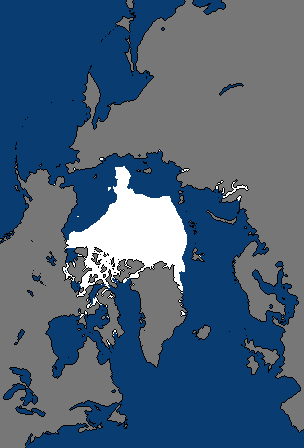

In [4]:
# Visualize the first image in the dataset
path = os.path.join("Data", "SeaIce", "September")
files = os.listdir(path)
Image.open(os.path.join(path,files[0]))

Access all image files available for September:

In [5]:
path = "Data/SeaIce/September/*.*"
count = 0
data = []
iceArea1 = []
for file in glob.glob(path):
    #Let's read each image file
    a = cv.imread(file,-1)
    #Convert to the appropriate space color
    c = cv.cvtColor(a, cv.COLOR_BGR2RGB)
    #Calculate the number of white pixels in the image
    number_of_white_pix = np.sum(c == 255)
    iceArea1.append((number_of_white_pix*25)^2)
    count += 1

In [6]:
type(iceArea1)

list

In [7]:
iceArea1[0]

np.int64(555148)

In [8]:
years = np.arange(1979,2022)
years

array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

## Using MATLAB to perform additional tasks 

When you are using the Python kernel in Jupyter and want to use MATLAB, first import and start MATLAB through the MATLAB Engine API

In [9]:
import matlab.engine

<div class="alert alert-block alert-warning">
<b>Note:</b> You can start the MATLAB Engine by simply doing eng = matlab.engine.start_matlab(). However, in order to use the existing MATLAB session running, follow the instructions below and update the engineName before running the next cell. 
</div>

In [10]:
# Get the MATLAB Engine session that you can use to connect
# In MATLAB command prompt type:
#  >> matlab.engine.shareEngine
#  >> matlab.engine.engineName
# ans =
#
#    'MATLAB_42516'
# MAKE SURE TO UPDATE THIS, OTHERWISE IT WON'T CONNECT

eng = matlab.engine.connect_matlab('MATLAB_5644')

In [11]:
# Convert the numpy array to the right format 
yearsfit  = eng.transpose(eng.double(years))
yearsfit

matlab.double([[1979.0],[1980.0],[1981.0],[1982.0],[1983.0],[1984.0],[1985.0],[1986.0],[1987.0],[1988.0],[1989.0],[1990.0],[1991.0],[1992.0],[1993.0],[1994.0],[1995.0],[1996.0],[1997.0],[1998.0],[1999.0],[2000.0],[2001.0],[2002.0],[2003.0],[2004.0],[2005.0],[2006.0],[2007.0],[2008.0],[2009.0],[2010.0],[2011.0],[2012.0],[2013.0],[2014.0],[2015.0],[2016.0],[2017.0],[2018.0],[2019.0],[2020.0],[2021.0]])

Make sure lists are converted to arrays before attempting a data conversion

In [12]:
iceAreafit = eng.transpose(np.array(iceArea1))
iceAreafit

matlab.int64([[555148],[835202],[615527],[859202],[542473],[779927],[875702],[833248],[698927],[819973],[752027],[686473],[642602],[871727],[800102],[906827],[530473],[780827],[607727],[503702],[682948],[542102],[560548],[575627],[731627],[913202],[866248],[618073],[495373],[721273],[761248],[564827],[758848],[835348],[536248],[870902],[710248],[868048],[711227],[462902],[414673],[723448],[814727]])

Call the curve fitting app:

In [13]:
iceFit = eng.curveFitter(yearsfit,iceAreafit)

Make sure you perform the curve fitting operation in the App. Then export to workspace. Assuming your variable is called 'fittedmodel', obtain the coefficients for the resulting curve fit 

In [14]:
coeffvalues = eng.coeffvalues(eng.workspace['fittedmodel'])
coeffvaluesF = np.array(coeffvalues)
coeffvaluesF

array([[-1.49216596e+03,  3.68753032e+06]])

Another alternative: Generate a function and save it in the same folder where you have your script. 


You should notice that it contains a linear model $p1*x + p2$. The coefficients p1 and p2 are stored in fields of the object. In which year does the linear trend predict zero ice area? You can calculate this by setting the linear function to zero $(p1*x + p2 = 0)$ and then solving for the value of x (which, in this case, represents the year when the ice area is predicted to be zero). 

In [ ]:
vanishYear = -coeffvaluesF[0,1]/coeffvaluesF[0,0]
vanishYear

> So, if the trend continues, **ice in the artic could be gone by year 2072!**

### Using datastores in MATLAB 

In [18]:
eng.pwd()

'/workspaces/codespaces-jupyter-matlab/notebooks/Exercise1'

In [19]:
eng.cd('/workspaces/codespaces-jupyter-matlab/notebooks/Exercise1')

'/workspaces/codespaces-jupyter-matlab/notebooks/Exercise1'

In [20]:
ds_Sep = eng.datastore("Data/SeaIce/September")
# copy variable to MATLAB workspace so we can use it
eng.workspace["ds_SepF"] = ds_Sep 

Get the number of files inside the datastore:

In [21]:
NFiles = eng.numel(eng.eval("ds_SepF.Files"))
NFiles

43.0

In [86]:
# Task: Attempt the same curve fiting task using datastores

<div class="alert alert-block alert-info">
<b>Final Note:</b> Do you want to see the full example in MATLAB? Check this existing Courseware on <a href=https://www.mathworks.com/matlabcentral/fileexchange/110125-climate-data-visualization-and-analysis>Climate Data Visualization and Analysis</a>  </div>